<a href="https://colab.research.google.com/github/MauricioCosta-Psico/MeusProjetosDS/blob/master/MySpotifyData2021_Hist%C3%B3rico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise dos Meus Dados no Spotify de 2021**

<center>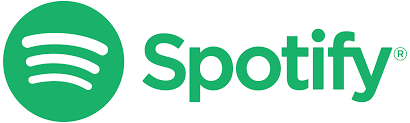

Como sou apaixonado por música 🤘, neste notebook eu vou usar os meus dados do ***Spotify*** do ano de 2021 para fazer algumas análises sobre como eu estou consumindo música nesta plataforma.

Caso você queira conhecer a politica de privacidade do spotify em relação aos seus dados, é só [clicar aqui](https://www.spotify.com/br/legal/privacy-policy/#:~:text=Solicitar%20acesso%20aos%20dados%20pessoais,como%20pedir%20informa%C3%A7%C3%B5es%20adicionais%3B%20ou). Neste link também explica como solicitar osseus dados, que é dentro da sua conta acessada pela internet (não é possível solicitar esses dados no app).

Vamos começar importanto os arquivos do histórico que é enviado por email após a solicitação  e que está em fomato json. Por algum motivo o meu histórico veio em 2 arquivos separados, então temos que concatenar os arquivos para não perder nenhum dado!

In [ ]:
# Importando os arquivos, em formato json, que no caso estão dividos em 2 (não sei o pq mas veio assim). 
# Para isso, usamos a função concat para juntar os arquivos ignorando o index.
import pandas as pd
import datetime as dt
df1 = pd.read_json("/content/drive/MyDrive/MeusProjetosDataScience/MySpotifyData2021/StreamingHistory0.json")
df2 = pd.read_json("/content/drive/MyDrive/MeusProjetosDataScience/MySpotifyData2021/StreamingHistory1.json")
data = pd.concat([df1, df2], ignore_index = True) 
data

,endTime,artistName,trackName,msPlayed
0,2021-01-08 22:13,Black Sabbath,Heaven and Hell - 2009 Remaster,2120
1,2021-01-26 20:25,Van Halen,Hot for Teacher - 2015 Remaster,472
2,2021-01-27 17:07,Jinjer,Pisces,65663
3,2021-01-27 18:49,Jinjer,Pisces,305571
4,2021-01-27 18:55,Jinjer,"Teacher, Teacher!",351642
...,...,...,...,...
10548,2022-01-26 03:12,Avenged Sevenfold,Hail to the King,2480
10549,2022-01-26 03:12,Slipknot,All Out Life,38250
10550,2022-01-26 03:12,Alice In Chains,The One You Know,288990
10551,2022-01-26 03:15,Papa Roach,Kill The Noise,133770


Bom, aqui vemos que temos apenas 4 colunas no arquivo e 10553 linhas:

Cabeçalho | Descrição
:--- | :---
endTime | data e horário da execução da música
artistName | Nome da Banda ou Artista
trackName | Nome da música
msPlayed | Tempo de execução da música em segundos

Percebemos também que temos dados do ano de 2022 também. Logo vamos filtrar o dataset para ficarmos apenas com dados do ano de 2021 o que vai ocasionar uma diminuição no número de linhas.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10553 entries, 0 to 10552
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     10553 non-null  object
 1   artistName  10553 non-null  object
 2   trackName   10553 non-null  object
 3   msPlayed    10553 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 329.9+ KB


A coluna **endTime** não está no formato datetime, então vamos converter os dados desta coluna com a função *datetime*.

In [ ]:
# modificando o tipo de dados da coluna endTime para datetime
data["endTime"] = pd.to_datetime(data["endTime"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10553 entries, 0 to 10552
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   endTime     10553 non-null  datetime64[ns]
 1   artistName  10553 non-null  object        
 2   trackName   10553 non-null  object        
 3   msPlayed    10553 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 329.9+ KB


Transformação da coluna concluída com sucesso!

Agora vamos filtrar o dataset para que tenhamos dados somente dados do ano de 2021. 

In [ ]:
# filtrando apenas o ano de 2021
data2021 = data.loc[(data['endTime'] >= '2021-01-01') & (data['endTime'] <= '2021-12-31')]
data2021

,endTime,artistName,trackName,msPlayed
0,2021-01-08 22:13:00,Black Sabbath,Heaven and Hell - 2009 Remaster,2120
1,2021-01-26 20:25:00,Van Halen,Hot for Teacher - 2015 Remaster,472
2,2021-01-27 17:07:00,Jinjer,Pisces,65663
3,2021-01-27 18:49:00,Jinjer,Pisces,305571
4,2021-01-27 18:55:00,Jinjer,"Teacher, Teacher!",351642
...,...,...,...,...
9445,2021-12-29 22:38:00,ANGRA,Insania,331800
9446,2021-12-29 22:43:00,ANGRA,The Bottom of My Soul,259330
9447,2021-12-29 22:47:00,ANGRA,War Horns,283100
9448,2021-12-29 22:53:00,ANGRA,Caveman,353340


Agora vou acrescentar uma coluna com o **dia da semana** (diadasemana) e outra com o **mês do ano** (mes) para poder verificar qual foi o dia e qual foi o mês que mais escutei música e para isso, vamos utilizar algumas funções da biblioteca datetime para facilitar a vida.



In [ ]:
# Criando coluna com o dia da semana e para os meses
data2021["diadasemana"] = data2021.endTime.dt.day_name()
data2021["mes"] = data2021.endTime.dt.month_name()
data2021

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,endTime,artistName,trackName,msPlayed,diadasemana,mes
0,2021-01-08 22:13:00,Black Sabbath,Heaven and Hell - 2009 Remaster,2120,Friday,January
1,2021-01-26 20:25:00,Van Halen,Hot for Teacher - 2015 Remaster,472,Tuesday,January
2,2021-01-27 17:07:00,Jinjer,Pisces,65663,Wednesday,January
3,2021-01-27 18:49:00,Jinjer,Pisces,305571,Wednesday,January
4,2021-01-27 18:55:00,Jinjer,"Teacher, Teacher!",351642,Wednesday,January
...,...,...,...,...,...,...
9445,2021-12-29 22:38:00,ANGRA,Insania,331800,Wednesday,December
9446,2021-12-29 22:43:00,ANGRA,The Bottom of My Soul,259330,Wednesday,December
9447,2021-12-29 22:47:00,ANGRA,War Horns,283100,Wednesday,December
9448,2021-12-29 22:53:00,ANGRA,Caveman,353340,Wednesday,December


### Para os gráficos vou utilizar toda a interatividade do **Plotly**, porém, vou utilizá-lo como backend para diminuir o uso de memória e de escrita de código também, até porque o intuito aqui é apenas brincar um pouco com os dados sobre o meu consumo de música, não é nada sério a ponto de caprichar totalmente nos gráficos.

In [ ]:
# utilizando o Plotly como backend para deixar os gráficos mais chamativos
pd.options.plotting.backend = "plotly"

### Agora vamos ver quais foram as 20 bandas que eu mais ouvi no ano de 2021

In [ ]:
# Colocando as 20 bandas mais ouvidas em um gráfico
data2021["artistName"].value_counts().sort_values()[-20:].plot.bar()

Já podemos perceber pelo gráfico inteirativo do *Plotly* que eu gosto muito de rock, pricipalmente a vertente Heavy Metal e Punk Rock. Apesar que minha adolescência grunge ainda não me deixou... O gráfico apresenta o rank das 20 bandas que eu mais ouvi no ano em questão

**Gojira** (517 músicas ouvidas) em 1º lugar e não poderia ser diferente! Com o lançamento do excelente albúm Fortitude em 2021, ouvi bastante este albúm e os demais do catálogo. O mais engraçado é que quem me apresentou esta banda foi meu filho que na época tinha 12 anos 😯 

**Machine Head**, **Trivium** e **Jinjer** são bandas que "descobri" neste ano e passei a ouvir e a admirar o trabalho deles. 

**Edu Falaschi**, grande vovalista brasileiro de Heavy Metal aparece muito bem rankeado nesta lista devido ao lançamento do excelente álbum *Vera Cruz*

Bom, depois não tem muitas supresas (pelo menos não para mim) onde a maioria das bandas eu ouço desde a minha adolescência ou até antes dela como é o caso de Metallica, Iron Maiden e Ramones.

### Quais foram as 20 músicas que eu mais ouvi no ano de 2021?

In [ ]:
# Colocando as 20 Músicas mais ouvidas em gráfico
data2021["trackName"].value_counts().sort_values()[-20:].plot(kind="bar")

Apesar da banda Gojira ter sido a que eu mais ouvi, é uma música do Machine Head - **Locust** (67 vevzes - parece que gostei bastante desta música) que foi a mais tocada no ano. Mas boa parte das músicas do álbum Fortitude estão entre as mais tocadas (Into the Storm, Amazonia, New Found))

Depois temos uma miscelânia de bandas, passando por Muse, Bullet for my Vallentine, Trivium, Edu Falaschi, Alice in Chaisn, Matanza, R.E.M., Mastodon, Pearl Jam e Placebo.

### Qual será o dia da semana que eu mais escutei música?

In [ ]:
# gráfico dia da semana que mais ouvi música
data2021["diadasemana"].value_counts().plot(kind="bar")

Domingo? Sim. Geralmente é o dia que eu tiro para relaxar a mente e o corpo e ficar com a família e com meus pensamentos. Geralmente faço churrasco para a família então o som fica ligado praticamente o dia todo!

Claro que no sabado e na sexta eu também escuto bastante música, mas geralmente nestes dias eu estou trabalhando ou jogando futebol, então diminui a quantidade de música ouvida quando comparamos com o domingo.

Estranho que nos dias da semana eu não escuto muita música? Claro que escuto, mas durante o trabalho, na maioria das vezes, eu dou preferência para ouvir música de algumas rádias rocks, por isso que a quantidade de música ouvida no Spotify é menor!

### E qual foi o mês em que eu mais ouvi música no Spotify?

In [10]:
# gráfico mês que mais ouvi música
data2021["mes"].value_counts().plot(kind="bar")

Aqui temos uma escadinha no gráfico. Bom, dezembro (1284 músicas reproduzidas) geralmente é mês de festa e recesso do trabalho, então é o mês com maior número de músicas ouvidas. Maio geralmente eu estou de férias o que explica estar em 2º lugar. E os demais meses... Ah!, deixa pra lá. O importante é ouvir música e não saber qual é o motivo!!! 

Este notebook teve como objetivo servir de apoio aos meus estudos em Data Analysis/Science. Mesmo na diversão nós aprendemos!

### **A música acalma a alma e provavelmente alguém já escreveu uma letra de música sobre algo que você está vivenciando ou já vivenciou!**